<a href="https://colab.research.google.com/github/raiharshit47/test/blob/main/Bank_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
Files = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6520,6521,15694143,Conti,686,France,Female,41,10,0.00,1,1,0,133086.45,0
4159,4160,15732268,Cook,751,France,Male,29,3,159597.45,1,1,0,39934.41,0
8525,8526,15751084,Mancini,712,France,Female,29,8,140170.61,1,1,1,38170.04,0
3200,3201,15720745,Murray,635,Spain,Male,24,4,140197.18,1,1,1,142935.83,0
2197,2198,15670753,Uvarova,614,Spain,Male,35,2,127283.78,1,1,1,31302.35,0


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace=True)

In [ ]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9536,550,Germany,Female,42,10,128707.31,1,1,0,63092.65,1
4307,770,Spain,Male,46,9,190678.02,1,1,1,14725.36,0
1685,613,Germany,Female,20,0,117356.19,1,0,0,113557.70,1
645,673,France,Female,34,8,42157.08,1,1,0,20598.59,1
6098,570,Germany,Female,57,5,86568.75,1,0,1,103660.31,0


In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.shape

(10000, 11)

In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

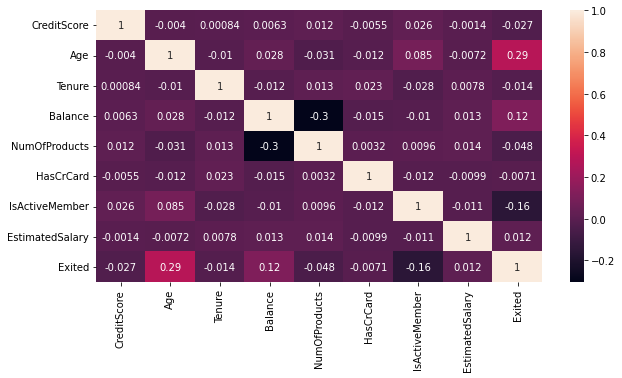

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [ ]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


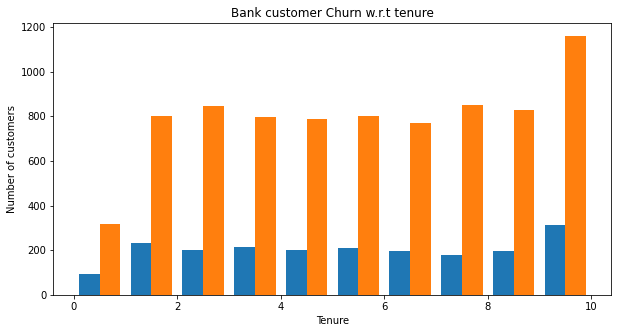

In [ ]:
tenure_churn_yes = df[df['Exited']==1].Tenure
tenure_churn_no = df[df['Exited']==0].Tenure

plt.figure(figsize=(10,5))
plt.hist([tenure_churn_yes, tenure_churn_no], label=[["Churn=Yes","Churn=No"]])
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Bank customer Churn w.r.t tenure")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


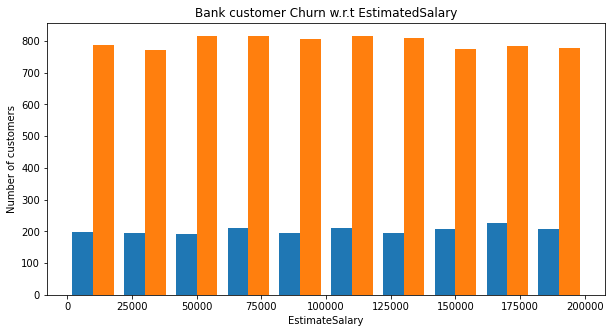

In [ ]:
EstimatedSalary_churn_yes = df[df['Exited']==1].EstimatedSalary   
EstimatedSalary_churn_no = df[df['Exited']==0].EstimatedSalary

plt.figure(figsize=(10,5))
plt.hist([EstimatedSalary_churn_yes, EstimatedSalary_churn_no], label=[["Churn=Yes","Churn=No"]])
plt.xlabel("EstimateSalary")
plt.ylabel("Number of customers")
plt.title("Bank customer Churn w.r.t EstimatedSalary")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


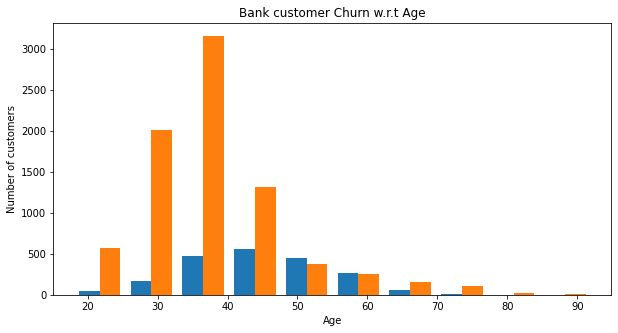

In [ ]:
Age_churn_yes = df[df['Exited']==1].Age   
Age_churn_no = df[df['Exited']==0].Age

plt.figure(figsize=(10,5))
plt.hist([Age_churn_yes, Age_churn_no], label=[["Churn=Yes","Churn=No"]])
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.title("Bank customer Churn w.r.t Age")
plt.show()

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
pd.get_dummies(data=df, columns=['Geography'])

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [ ]:
df['Gender'].replace({'Female': 1, 'Male':0}, inplace=True)

In [ ]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4726,633,Germany,0,50,7,88302.65,1,1,1,195937.16,0
7690,569,Spain,0,31,1,115406.97,1,0,0,145528.22,0
3351,474,Germany,1,34,9,176311.36,1,1,0,160213.27,0
6771,747,Germany,0,29,7,117726.33,1,1,1,175398.34,0
7424,570,Germany,0,38,1,127201.58,1,1,0,147168.28,1


In [ ]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9691,765,0,42,4,123311.39,2,1,1,82868.34,0,1,0,0
336,659,1,32,3,150923.74,2,0,1,174652.51,0,0,1,0
1542,530,1,33,4,129307.32,1,1,1,172930.28,0,1,0,0
5032,684,1,46,3,102955.14,2,1,0,154137.33,0,0,1,0
6017,487,1,34,2,96019.50,1,0,0,9085.00,0,1,0,0


In [ ]:
df1['Age'] = df['Age']/100
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,0.42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,0.41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,0.42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,0.39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,0.43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols = ['Tenure','Balance','EstimatedSalary']
df1[cols] = scaler.fit_transform(df1[cols])

In [ ]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,0.42,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,608,1,0.41,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,502,1,0.42,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,699,1,0.39,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,850,1,0.43,0.2,0.500246,1,1,1,0.395400,0,0,0,1


In [ ]:
cols1 = ['CreditScore', 'NumOfProducts']
df1[cols1] = scaler.fit_transform(df1[cols1]) 

In [ ]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8708,0.856,1,0.48,0.3,0.407698,0.333333,1,0,0.913486,0,0,1,0
8576,0.802,1,0.37,0.9,0.731826,0.333333,0,0,0.248641,0,1,0,0
9735,0.700,1,0.32,0.8,0.442104,0.333333,1,1,0.809248,1,1,0,0
7274,0.604,1,0.34,0.6,0.388348,0.333333,1,1,0.521651,0,1,0,0
6081,0.352,0,0.52,0.8,0.373022,0.000000,0,1,0.106096,1,1,0,0


In [ ]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_train.shape

(8000, 12)

In [ ]:
y_train.shape

(8000,)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(10, input_shape=(12, ), activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5062 - accuracy: 0.7946
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.8009
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.8031
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.8046
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8071
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.8101
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8124
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8148
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8152
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4221 - accura

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 3ms/step - loss: 0.3609 - accuracy: 0.8490


[0.3609251081943512, 0.8489999771118164]

In [ ]:
yp = model.predict(X_test)
yp[:5]

array([[0.5233466 ],
       [0.6703209 ],
       [0.65605044],
       [0.02937394],
       [0.6274856 ]], dtype=float32)

In [ ]:
y_test[:5]

937     0
9355    0
2293    1
192     0
8675    0
Name: Exited, dtype: int64

In [ ]:
y_pred = []
for i in yp:
  if i> 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:5]

[1, 1, 1, 0, 1]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1578
           1       0.73      0.45      0.56       422

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000



Text(69.0, 0.5, 'Truth')

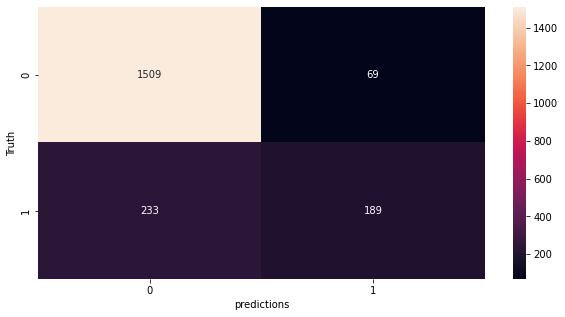

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10,5))

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predictions')
plt.ylabel('Truth')

In [ ]:
round((1533+166)/(1533+166+256+45), 2)  #Accuracy

0.85

In [ ]:
round((1533)/(1533+179), 2)  #Precision for 0 class

0.9

In [ ]:
round((166)/(166+45), 2) #Precision for 1 class

0.79

In [ ]:
round(1533/(1533+45), 2)  #Recall for 0 class

0.97

In [ ]:
round((166)/(166+256), 2) #Recall for 1 class

0.39

In [ ]:
count_class_0, count_class_1 = df1.Exited.value_counts()

In [ ]:
count_class_0

7963

In [ ]:
def ANN_Bank_Churn(X_train, y_train, X_test, y_test, loss, weights):
  model = keras.Sequential([
                          keras.layers.Dense(10, input_shape=(12, ), activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
    optimizer='adam',
    loss=loss,
    metrics=['accuracy']
  )

  if weights==-1:
    model.fit(X_train, y_train, epochs=100)
  else:
    model.fit(X_train, y_train, epochs=100, class_weight=weights)
  
  print(model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print("Classification report: \n", classification_report(y_test, y_preds))
  return y_preds



In [ ]:
# Method 1: under sampling

df_class_0 = df1[df1.Exited==0]
df_class_1 = df1[df1.Exited==1]



In [ ]:
df_class_1.shape

(2037, 13)

In [ ]:
df_class_0.shape

(7963, 13)

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1])

print('Random Under sampling')
print(df_test_under.Exited.value_counts())

Random Under sampling
0    2037
1    2037
Name: Exited, dtype: int64


In [ ]:
X = df_test_under.drop('Exited', axis='columns')
y = df_test_under['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

In [ ]:
y_train.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

In [ ]:
y_preds = ANN_Bank_Churn(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.6982 - accuracy: 0.5084
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5164
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6085
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6438
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.6652
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.6701
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.6741
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.6797
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.6895
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5889 - accura

In [ ]:
# Method 2: Over sampling

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print("Random over sampling:")
print(df_test_over.Exited.value_counts())

Random over sampling:
0    7963
1    7963
Name: Exited, dtype: int64


In [ ]:
X = df_test_over.drop('Exited', axis='columns')
y = df_test_over['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

In [ ]:
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [ ]:
y_preds = ANN_Bank_Churn(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 2s 3ms/step - loss: 0.6547 - accuracy: 0.6171
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: 0.6266 - accuracy: 0.6471
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.6121 - accuracy: 0.6622
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5980 - accuracy: 0.6788
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5855 - accuracy: 0.6918
Epoch 6/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5718 - accuracy: 0.7032
Epoch 7/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5569 - accuracy: 0.7177
Epoch 8/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5418 - accuracy: 0.7321
Epoch 9/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5303 - accuracy: 0.7392
Epoch 10/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5201 - accura

In [ ]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

In [ ]:
# Method 3: SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)



In [ ]:
y_sm.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [ ]:
y_pred = ANN_Bank_Churn(X_sm, y_sm, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 2s 3ms/step - loss: 0.6656 - accuracy: 0.6074
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: 0.6218 - accuracy: 0.6600
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.6021 - accuracy: 0.6822
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5761 - accuracy: 0.7038
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5381 - accuracy: 0.7389
Epoch 6/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5043 - accuracy: 0.7617
Epoch 7/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4897 - accuracy: 0.7677
Epoch 8/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4837 - accuracy: 0.7679
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4799 - accuracy: 0.7717
Epoch 10/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4786 - accura

In [ ]:
# Method 4: use of ensemble with under sampling
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

In [ ]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [ ]:
df2 = X_train.copy()
df2['Exited'] = y_train

In [ ]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [ ]:
df2_class_0 = df2[df2.Exited==0]
df2_class_1 = df2[df2.Exited==1]

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

  X_train = df_train.drop('Exited', axis='columns')
  y_train = df_train.Exited

  return X_train, y_train

In [ ]:
X_train, y_train = get_train_batch(df2_class_0, df2_class_1, 0, 1630)
y_pred1 = ANN_Bank_Churn(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5448
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.5923
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.6113
Epoch 4/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6460 - accuracy: 0.6294
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6388 - accuracy: 0.6387
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.6423
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.6567
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.6663
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6134 - accuracy: 0.6706
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6070 - accura

In [ ]:
X_train, y_train = get_train_batch(df2_class_0, df2_class_1, 1630, 3260)
y_pred2 = ANN_Bank_Churn(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 3ms/step - loss: 0.6834 - accuracy: 0.5638
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6630 - accuracy: 0.5985
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.6120
Epoch 4/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.6166
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.6196
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.6328
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6339 - accuracy: 0.6331
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.6457
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6257 - accuracy: 0.6482
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6196 - accura

In [ ]:
X_train, y_train = get_train_batch(df2_class_0, df2_class_1, 3260, 4890)
y_pred3 = ANN_Bank_Churn(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 3ms/step - loss: 0.6693 - accuracy: 0.6074
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.6245
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6377
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6445
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.6521
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6270 - accuracy: 0.6549
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6225 - accuracy: 0.6604
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6176 - accuracy: 0.6690
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6117 - accuracy: 0.6736
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6058 - accura

In [ ]:
X_train, y_train = get_train_batch(df2_class_0, df2_class_1, 4890, 6370)
y_pred4 = ANN_Bank_Churn(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
98/98 [==============================] - 1s 2ms/step - loss: 0.6857 - accuracy: 0.5640
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.6151
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.6399
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.6437
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6284 - accuracy: 0.6531
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.6521
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6189 - accuracy: 0.6579
Epoch 8/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6147 - accuracy: 0.6633
Epoch 9/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.6672
Epoch 10/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6048 - accuracy: 0.6678
Epoch 11/

In [ ]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i] + y_pred4[i]
  if n_ones>1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0
    

In [ ]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1593
           1       0.45      0.80      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.76      0.78      2000

